<a href="https://colab.research.google.com/github/vaughnpaul/scholarshipai/blob/main/scholarshipai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# @title
import os
!pip install pyairtable
from pyairtable import Table
from pyairtable import Api

# 1. Install pyairtable (if you haven't already):
!pip install pyairtable

# 2. Set Airtable API Key and Base ID as Colab Secrets:
#    - Go to Colab settings (gear icon) -> Secrets.
#    - Add two secrets:
#        - AIRTABLE_API_KEY (Your Airtable API key)
#        - AIRTABLE_BASE_ID (Your Airtable Base ID)

# 3. Retrieve secrets from environment variables:
from google.colab import userdata
AIRTABLE_API_KEY = userdata.get('AIRTABLE_API_KEY')
AIRTABLE_BASE_ID = userdata.get('AIRTABLE_BASE_ID')

if not AIRTABLE_API_KEY or not AIRTABLE_BASE_ID:
    raise ValueError("AIRTABLE_API_KEY and AIRTABLE_BASE_ID must be set as Colab Secrets.")
print("AIRTABLE_API_KEY: " + userdata.get('AIRTABLE_API_KEY') + "\n")
print("AIRTABLE_BASE_ID: " + userdata.get('AIRTABLE_BASE_ID') + "\n")
AIRTABLE_TABLE_NAME = "tblv5Q1ajAXVtxy9l"  # Your Airtable table name
AIRTABLE_VIEW_ID = "viwQKJVMUyyZaCLzn" # Your Airtable View ID

# Initialize Airtable API object:
api = Api(AIRTABLE_API_KEY)

# Initialize Airtable table object using the Api object:
table = api.table(AIRTABLE_BASE_ID, AIRTABLE_TABLE_NAME) # Pass the view ID
# print.table.view(AIRTABLE_VIEW_ID)

def get_scholarship_data_from_airtable(table, question_field="question_text", name_field="scholarship_name (from scholarships)"):
    """Retrieves question_text and scholarship_names from Airtable.

    Handles missing fields and returns a list of dictionaries.
    """
    try:
        records = table.all() # no need to specify the view here since it is already passed when creating the table object
        scholarship_data = []
        for record in records:
            fields = record.get("fields", {})
            question = fields.get(question_field)
            name = fields.get(name_field)

            # Append even if one field is missing, using empty strings as placeholders
            scholarship_data.append({
                "question_text": question if question else "",
                "scholarship_name (from scholarships)": name if name else ""
            })

        return scholarship_data
    except Exception as e:
        print(f"Error retrieving data from Airtable: {e}")
        return []


essay_prompts = get_scholarship_data_from_airtable(table)

if essay_prompts:
    print("Essay prompts from Airtable:")
    for prompt in essay_prompts:
        print(prompt)

    try:
        import pandas as pd
        df = pd.DataFrame(essay_prompts)
        print("\nPandas DataFrame:")
        print(df)
    except ImportError:
        print("\nPandas is not installed. Install it with: !pip install pandas")
    except Exception as e:
        print(f"\nCould not create Pandas DataFrame: {e}")

else:
    print("No scholarship data found in Airtable.")

AIRTABLE_API_KEY: patKBUMkCGnHg3PLx.3624a63ccebf63d75cd2c401649cd19dcf4993dbc7fba71bfef91ae9a79e8fad

AIRTABLE_BASE_ID: appdGIlfncu4WFju6

Essay prompts from Airtable:
{'question_text': 'What obstacles have you overcome to pursue your education', 'scholarship_name (from scholarships)': ['Sample']}
{'question_text': 'Tell us about a time you failed and what you learned from it', 'scholarship_name (from scholarships)': ['Sample']}
{'question_text': 'how are you\n', 'scholarship_name (from scholarships)': ['UNCF']}
{'question_text': 'What does success mean to you', 'scholarship_name (from scholarships)': ['Sample']}
{'question_text': 'As a student, what would you consider to be two of your strengths?  And, which academic challenge have you overcome?', 'scholarship_name (from scholarships)': ['TeaneckCommunity']}
{'question_text': 'What are your educational and career goals and how will this scholarship help you achieve them', 'scholarship_name (from scholarships)': ['Sample']}
{'question_

models/embedding-001
models/text-embedding-004
{'embedding': [[-0.03488876, -0.039179835, -0.04640486, 0.05761809, 0.031436954, 0.073007785, -0.0035453143, 0.0121500185, 0.015148308, 0.0050291424, 0.029134644, 0.037695307, 0.056864128, 0.04067613, 0.08609671, 0.014250545, 0.06625507, 0.017392265, -0.04823211, -0.015952637, -0.034195952, -0.006965631, 0.0067995326, -0.029217865, -0.028110627, -0.02972727, 0.0367627, -0.08259449, -0.0045726798, -0.023499278, 0.046474773, 0.029939651, -0.019959118, -0.071109526, 0.0176946, 0.042578306, -0.01728245, -0.07268175, 0.025350712, -0.01273509, -0.05068318, 0.052872375, -0.034146007, 0.013217153, -0.045850594, -0.0022045588, 0.003419421, 0.06997836, 0.013449473, 0.013457443, 0.022785643, 0.010846587, 0.012656987, 0.0354587, 0.015625743, -0.037208922, 0.013747745, -0.06940601, 0.028423369, -0.047438893, -0.0029807943, -0.0060766134, -0.036657754, -0.016553028, 0.001536042, -0.0058534164, -0.010391482, -0.031121455, -0.012232145, 0.03260334, -0.038

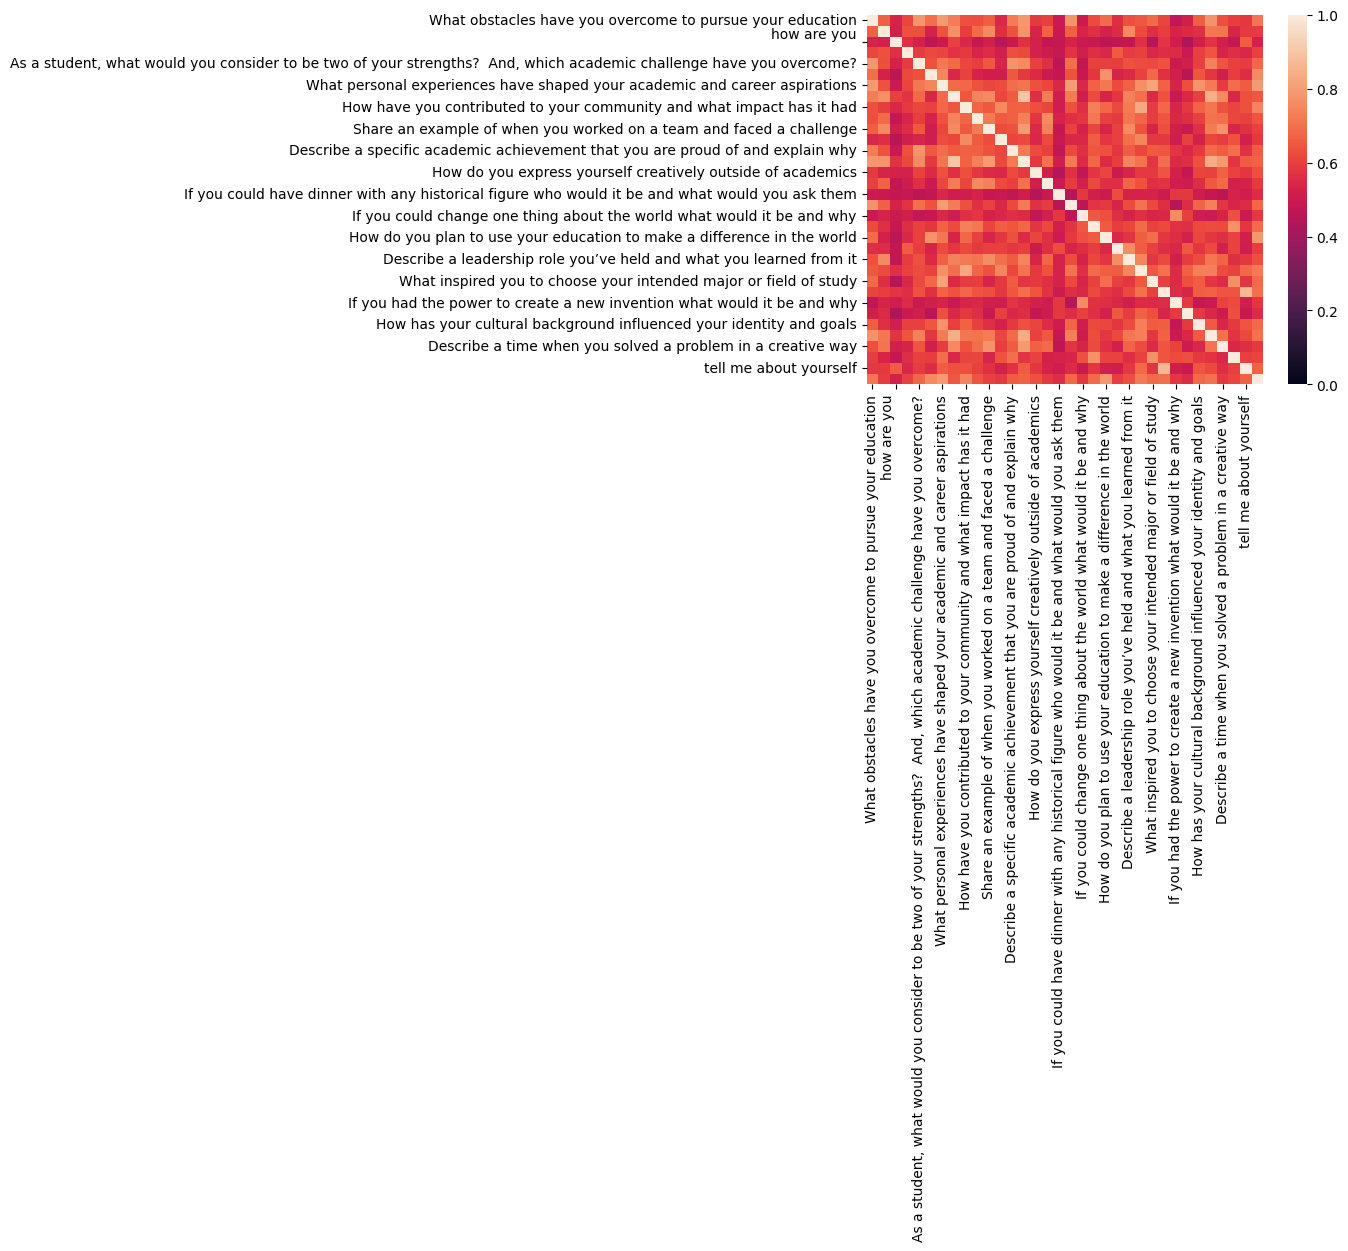

In [37]:
%pip install -U -q "google-generativeai>=0.8.3"
import google.generativeai as genai
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)
for model in genai.list_models():
  if 'embedContent' in model.supported_generation_methods:
    print(model.name)
# --- The crucial change is here ---
essay_prompts_data = get_scholarship_data_from_airtable(table)  # Get the data (correct variable name)
question_texts = [
        prompt.get("question_text") for prompt in essay_prompts_data if prompt.get("question_text")
    ]  # Extract all question texts

if question_texts: # if there are questions to embed
        try:
            responses = genai.embed_content(
                model='models/text-embedding-004',
                content=question_texts,  # Pass the list of strings
                task_type='semantic_similarity'
            )
            print(responses)
        except Exception as e:
            print(f"Embedding error: {e}")
else:
        print("No question texts found in the data.")

import pandas as pd
import seaborn as sns


# Set up the embeddings in a dataframe.
df = pd.DataFrame(response['embedding'], index=question_texts)
# Perform the similarity calculation
sim = df @ df.T
# Draw!
sns.heatmap(sim, vmin=0, vmax=1);